In [2]:
import pandas as pd
df = pd.read_csv("AI_heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,M,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,M,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,M,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,M,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,F,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,M,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,M,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47.0,M,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50.0,F,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:

target_counts = df['target'].value_counts()
print("Target counts:")
print(target_counts)


Target counts:
1    526
0    499
Name: target, dtype: int64


/tmp/ipykernel_24451/1307843007.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


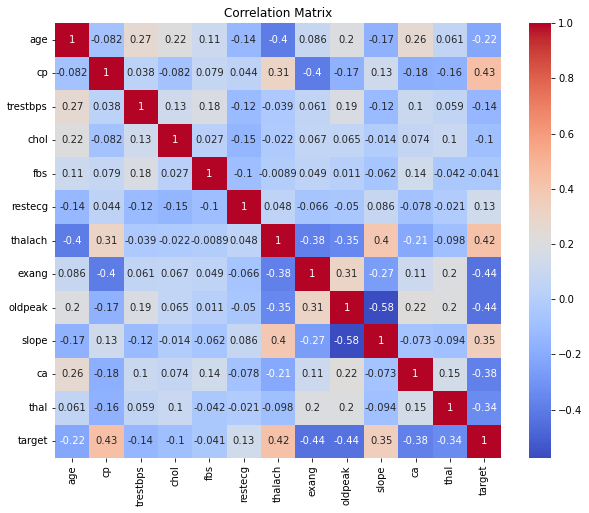

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [26]:
df.dropna(inplace=True)


In [27]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47.0,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59.0,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47.0,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


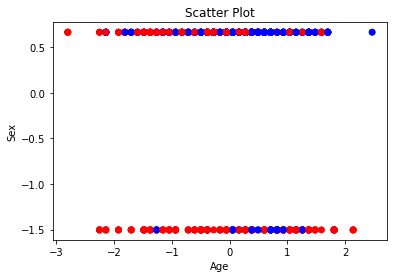

In [34]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel("Age")
plt.ylabel("Sex")
plt.title("Scatter Plot")
plt.show()


In [30]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp1 = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', random_state=42)


In [31]:
# Train the first MLP classifier
mlp1.fit(X_train, y_train)

# Train the second MLP classifier
mlp2.fit(X_train, y_train)


/home/waqar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/waqar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 20), random_state=42)

In [32]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61.0,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47.0,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59.0,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47.0,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [33]:
from sklearn.metrics import accuracy_score

y_pred1 = mlp1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy of MLP1:", accuracy1)

y_pred2 = mlp2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy of MLP2:", accuracy2)


Accuracy of MLP1: 0.855595667870036
Accuracy of MLP2: 0.9422382671480144
